# Tratamiento inicial de datos del primer dataset
En este notebook se hará un preprocesamiento de los datos, eliminando las stopwords, palabras que solo se repiten una vez. También reduciremos las palabras derivadas a la raíz (stemming).

Guardaremos el nuevo dataset con los datos limpios para evitar realizar el preprocesamiento de nuevo y teniendo mejor dividido cada apartado de la práctica.

In [79]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt

# Permitir ver columnas completas
pd.set_option('display.max_colwidth', None)

In [80]:
# Función para cargar dataframe
def load_data(ruta, nombre):
    path = os.path.join(ruta, nombre)    
    return pd.read_csv(path, encoding="ISO-8859-1")

# Análisis exploratorio

In [81]:
# Carga de datos
df = load_data('data', 'train_sentiment.csv')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T


Tamaño del dataset

In [82]:
df.shape

(99989, 3)

Información sobre los datos

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


Vemos que en ninguna columna tenemos valores nulos

Análisis de las columnas numéricas

In [84]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


La columna ItemID no nos interesa porque parece un identificador de la fila, pero si nos fijamos en la columna Sentiment, vemos que el valor máximo es 1 y que el mínimo es 0, parece una variable categórica ya convertida a número. 

Elimino la columna ItemID:

In [85]:
df.drop(['ItemID'], axis=1, inplace=True)

## Analizamos la distribución de valores en la variable Sentiment:

In [86]:
print('Sentiment:')
print(df['Sentiment'].value_counts())

Sentiment:
1    56457
0    43532
Name: Sentiment, dtype: int64


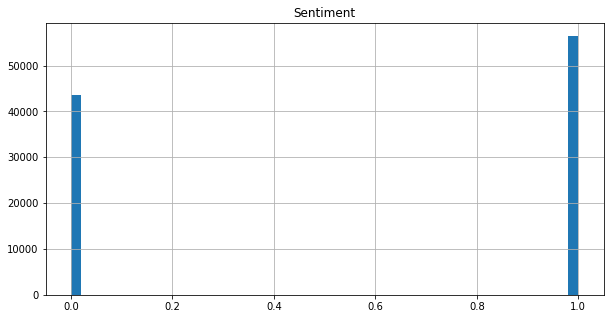

In [87]:
# Histograma
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,5))
plt.show()

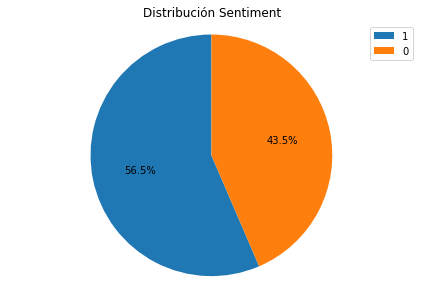

In [88]:
labels = '1', '0'
sizes = df['Sentiment'].value_counts()

fig1, ax1 = plt.subplots()

patches, texts, junk = ax1.pie(sizes, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.legend(patches, labels, loc="best")
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribución Sentiment', fontsize=12)
plt.show()

# Tratamiento de datos
Antes de analizar los Tweets, realizaré actividades de pre procesamiento como las siguientes:

- Borraré las url, menciones, hashtags, emojis etc
- **Eliminar stopwords** usando Nltk que es una librería de procesamiento de lenguaje natural
- Reemplazo de **Slangs** y abreviaciones
- Rempleazo de **contracciones**
- **Lematización** para llevar las palabras a su forma base considerando en análisis morfológico. Se usará Nltk
- NO usaré **Stemming** para llevar las palabras a su forma base ya que la lemmatización es más avanzada.
- Se borrarán las palabras que solo existen una vez, ya que estas harían fallar el algoritmo ya que al hacer la división caerían o en Test o en Train

In [89]:
df_pandas = df

#change tweets into lowercase
df_pandas['SentimentText'] = df_pandas['SentimentText'].str.lower()

#Removing RT retweet term
df_pandas['SentimentText'] = df_pandas['SentimentText'].str.replace('rt', '')

#Removing usernames
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'@\w+', '', regex=True)

#Removing url links
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'http\S+', '', regex=True)
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'www.[^ ]+', '', regex=True)

#remove next line \n
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace('\n',' ', regex=True)

#remove numbers
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'[0-9]+', '', regex=True)

#removing special characters
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)

# Removing tweet topic
df_pandas['SentimentText'] = df_pandas['SentimentText'].str.replace('haze', '')

print(df_pandas)

Sentiment  \
0              0   
1              0   
2              1   
3              0   
4              0   
...          ...   
99984          0   
99985          1   
99986          0   
99987          1   
99988          1   

                                                                                                                       SentimentText  
0                                                                                                        is so sad for my apl friend  
1                                                                                                      i missed the new moon trailer  
2                                                                                                                 omg its already  o  
3                          omgaga im sooo  im gunna cry i've been at this dentist since  i was suposed  just get a crown put on mins  
4                                                                                          

In [90]:
import nltk
nltk.download('stopwords')
from nltk.corpus import (stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
stop_words_eng = stopwords.words('english')
print(stop_words_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Vemos que algunas stopwords no podrían usarse en un análisis de sentimiento porque cambiarían el significado de los tweets, así que de la lista de stop words, eliminamos las que no interesen.

In [92]:
listaBorrar = {'no', 'but', 'against', 'again', 'nor', 'not', "don't", 'don', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

stop_words_eng = [elem for elem in stop_words_eng if elem not in listaBorrar]
print(stop_words_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 

In [93]:
df_pandas['SentimentText'] = df_pandas['SentimentText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_eng)]))

print(df_pandas)

Sentiment  \
0              0   
1              0   
2              1   
3              0   
4              0   
...          ...   
99984          0   
99985          1   
99986          0   
99987          1   
99988          1   

                                                                   SentimentText  
0                                                                 sad apl friend  
1                                                        missed new moon trailer  
2                                                                    omg already  
3      omgaga im sooo im gunna cry i've dentist since suposed get crown put mins  
4                                                        think mi bf cheating tt  
...                                                                          ...  
99984                      seems like repeating problem hope able find something  
99985              arrrr replied different tweets time i'll see duno hell kateyy  
99986              

## Borrar emojis
Por si ha quedado algún emoji en el texto, lo eliminamos

In [100]:
import re

def deEmojify(inputString):  
    return inputString.encode('ascii', 'ignore').decode('ascii')     

In [104]:
df_pandas['SentimentText'] = df_pandas['SentimentText'].apply(lambda x: deEmojify(x))
df_pandas.tail()

,Sentiment,SentimentText
99984,0,seems like repeating problem hope able find something
99985,1,arrrr replied different tweets time i'll see duno hell kateyy
99986,0,ya thought
99987,1,yes yes i'm glad fun
99988,1,haha yes


## Slangs
Se reemplazarán los slangs y las abreviaciones usando una lista de palabras de un [Repositorio de Github](https://github.com/Deffro/text-preprocessing-techniques) que hace un ejemplo también con tweets.

In [111]:
""" Creates a dictionary with slangs and their equivalents and replaces them """
from functools import partial

with open('slang.txt') as file:
    slang_map = dict(map(str.strip, line.partition('\t')[::2])
    for line in file if line.strip())

slang_words = sorted(slang_map, key=len, reverse=True) # longest first for regex
regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

In [113]:
df_pandas['SentimentText'] = df_pandas['SentimentText'].apply(lambda x: replaceSlang(x))
df_pandas[:100]

,Sentiment,SentimentText
0,0,sad apl friend
1,0,missed new moon trailer
2,1,oh my god already
3,0,omgaga im sooo im gunna cry i've dentist since suposed get crown put mins
4,0,think mi boyfriend cheating trending topic
...,...,...
95,0,mi momacita won't let go boyfriend's bball game grrr
96,0,mom says get new phone immediatelyoff tmobile paying
97,0,new car stolenby mother wanted go pose church
98,0,no hang girls day moro hope


## Contracciones
Reemplazo las contracciones del lenguaje

In [114]:
contractions = {
    "ain't": "is not", "aren't": "are not","can't": "cannot", 
    "can't've": "cannot have", "'cause": "because", "could've": "could have", 
    "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
    "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
    "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
    "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
    "I'll've": "I will have","I'm": "I am", "I've": "I have", 
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
    "i'll've": "i will have","i'm": "i am", "i've": "i have", 
    "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
    "it'll": "it will", "it'll've": "it will have","it's": "it is", 
    "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
    "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
    "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
    "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
    "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
    "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
    "this's": "this is",
    "that'd": "that would", "that'd've": "that would have","that's": "that is", 
    "there'd": "there would", "there'd've": "there would have","there's": "there is", 
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
    "they'll've": "they will have", "they're": "they are", "they've": "they have", 
    "to've": "to have", "wasn't": "was not", "we'd": "we would", 
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
    "we're": "we are", "we've": "we have", "weren't": "were not", 
    "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
    "what's": "what is", "what've": "what have", "when's": "when is", 
    "when've": "when have", "where'd": "where did", "where's": "where is", 
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
    "who's": "who is", "who've": "who have", "why's": "why is", 
    "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
    "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def replaceContractions(inputString):
    for word in inputString.split():
        if word.lower() in contractions:
            inputString = inputString.replace(word, contractions[word.lower()])

    return(inputString)

In [115]:
df_pandas['SentimentText'] = df_pandas['SentimentText'].apply(lambda x: replaceContractions(x))
df_pandas[:100]

,Sentiment,SentimentText
0,0,sad apl friend
1,0,missed new moon trailer
2,1,oh my god already
3,0,omgaga im sooo im gunna cry i have dentist since suposed get crown put mins
4,0,think mi boyfriend cheating trending topic
...,...,...
95,0,mi momacita will not let go boyfriend's bball game grrr
96,0,mom says get new phone immediatelyoff tmobile paying
97,0,new car stolenby mother wanted go pose church
98,0,no hang girls day moro hope


# Visualización palabras negativas y positivas
Una vez hecho el tratamiento de datos, mostramos dos nubes de etiquetas con las palabras más usadas de ambas categorías.

In [96]:
return
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

SyntaxError: 'return' outside function (<ipython-input-96-82d08a8e82d5>, line 1)

In [ ]:
return
class wordcloud():
    def wordclouddraw(self,df_pandas,sent):
        if sent == 'positive':
            text_filtered_sentiment = df_pandas['Sentiment'] == 1
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.SentimentText.to_string(index=False, header=False)
            filename = "/HAZE_pos_tweets_spark.png"
        elif sent == 'negative':
            text_filtered_sentiment = df_pandas['Sentiment'] == 0
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.SentimentText.to_string(index=False, header=False)
            filename = "/HAZE_neg_tweets_spark.png"
        else:
            # Mostrar ambos
            text = df_pandas.SentimentText.to_string( index=False, header=False)
            filename = "/HAZE_all_tweets_spark.png"

        file = os.getcwd()

        wordcloud = WordCloud(
            width = 1500,
            height = 1000,
            background_color = 'black',
            stopwords=['haze']
        ).generate(text)

        fig = plt.figure(
            figsize = (20, 10),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)

        wcpath=file+filename

        wordcloud.to_file(wcpath)

## Sentimiento positivo

In [ ]:
return
genwordcloud = wordcloud()
genwordcloud.wordclouddraw(df_pandas, sent="positive")

## Sentimiento negativo

In [ ]:
return
genwordcloud.wordclouddraw(df_pandas, sent="negative")